In [1]:
%config Completer.use_jedi = False

### 1. Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

### 2. Data Preparation

In [3]:
X = pd.read_csv("./Training_Data/Logistic_X_Train.csv")
y = pd.read_csv("./Training_Data/Logistic_Y_Train.csv")
X_test = pd.read_csv("./Test_Cases/Logistic_X_Test.csv")

In [4]:
X.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [5]:
y.head()

,label
0,1
1,1
2,1
3,0
4,0


In [6]:
data = pd.concat((X, y), axis = 1)

In [7]:
data.head()

,f1,f2,f3,label
0,-1.239375,0.749101,-0.528515,1
1,-1.036070,0.801436,-1.283712,1
2,-0.615579,1.579521,-1.391927,1
3,1.335978,1.348651,1.433564,0
4,0.658925,1.300019,0.571603,0


### 3. Data Visualization

<AxesSubplot:xlabel='f1', ylabel='f2'>

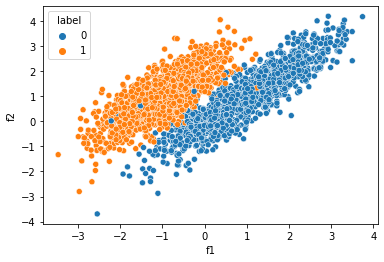

In [8]:
sns.scatterplot(x = 'f1', y = 'f2', data = data, hue = 'label')

<AxesSubplot:xlabel='f1', ylabel='f3'>

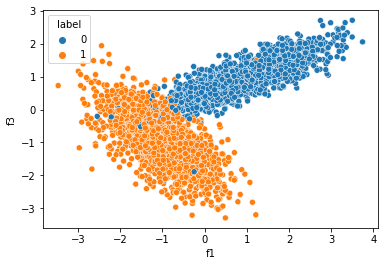

In [9]:
sns.scatterplot(x = 'f1', y = 'f3', data = data, hue = 'label')

<AxesSubplot:xlabel='f2', ylabel='f3'>

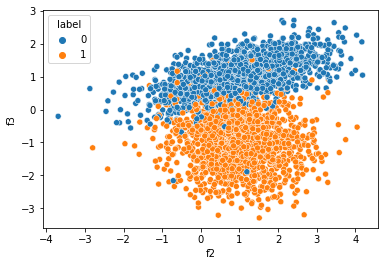

In [10]:
sns.scatterplot(x = 'f2', y = 'f3', data = data, hue = 'label')

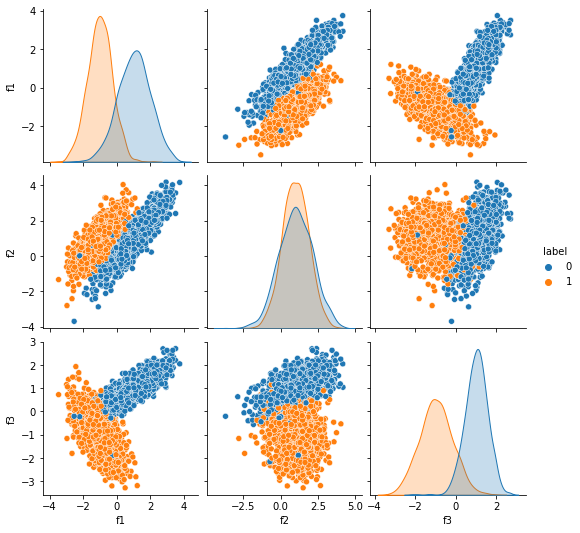

In [11]:
sns.pairplot(data = data, hue = 'label')

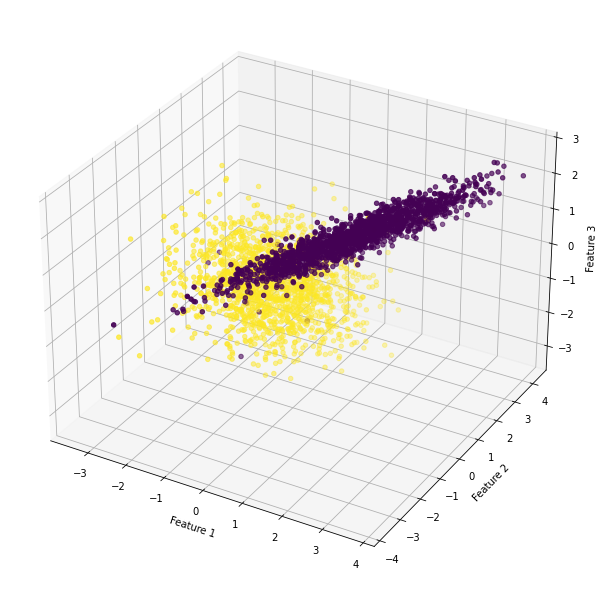

In [12]:
fig = plt.figure(figsize = (8, 8))
ax = Axes3D(fig)
x = data['f1']
y = data['f2']
z = data['f3']

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")

ax.scatter(x, y, z, c = data['label'])
plt.show()

### 4. Training and Validation Split

In [13]:
features = data[ ['f1', 'f2', 'f3']]
target = data['label']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size = 0.25)

### 5. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [16]:


model.fit(X_train, y_train)

LogisticRegression()

In [17]:
model.coef_

array([[-3.65824501,  2.91198536, -2.22290216]])

In [18]:
model.intercept_

array([-3.91273357])

In [19]:
print("Training Score", model.score(X_train, y_train))

Training Score 0.9942222222222222


In [20]:
print("Validation Score", model.score(X_val, y_val))

Validation Score 0.9973333333333333


### 6. Model Prediction on Test Set

In [21]:
y_pred = model.predict(X_test)

In [22]:
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [23]:
result = pd.DataFrame(y_pred, columns = ['label'])

In [24]:
result

,label
0,1
1,1
2,0
3,1
4,1
...,...
995,0
996,0
997,1
998,1


In [25]:
result.to_csv("result.csv", index = False)